<a href="https://colab.research.google.com/github/roheth286/Titanic_ML_Model/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Task**


---

Step-by-Step Breakdown :

1. Data Preparation
  * Load the Titanic dataset.
  * Handle missing values and clean the data.
  * Encode categorical features and scale numerical data.

2. Exploratory Data Analysis (EDA)
  * General summary statistics.
  * Bar Plot (Survival Rate by Passenger Class).
  * Box Plot (Age Distribution by Survival Status).
  * Count Plot (Survival Rate by Gender).

3. Machine Learning Model
  * Train  basic classification models.
  * Evaluate performance using accuracy and F1-score.
  * Optimize model with feature selection and tuning.

# **Dataset of Passengers Details**


---

Save the dataset to your local system and upload it when prompted in the import dataset cell.

Link: https://drive.google.com/file/d/1hTw4BTG37qo3OF81wEycfy0qnOrG5Vzm/view

# **Import necessary libraries**



---



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# **Import Dataset**



---



1.   User prompt to upload the csv file.
2.   Reads the Titanic-Dataset.csv file into a Pandas DataFrame (df).
3.   Display the first few rows




In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


# **Data Cleaning**



---

In this section, we performed essential data cleaning steps to ensure the dataset is ready for analysis.

1. Checked for Missing Values – Identified the number of missing values in each column before applying any transformations.

2. Handled Missing Values – Filled missing Age values using the median age based on Pclass and Sex to ensure logical imputation.

3. Removed Irrelevant Features – Dropped PassengerId, Name, and Ticket as they are not useful for model training.

4. Categorical Encoding – Converted categorical columns into numerical format:
Sex converted to binary (0 = male, 1 = female).
One-hot encoded Embarked (S, C, Q) for better processing.
Extracted Additional Feature – Created HasCabin (1 = has a cabin, 0 = no cabin) to retain cabin information while simplifying the dataset.

5. Removed Redundant Column – Dropped the original Cabin column after extracting relevant information.

6. Verified Final Dataset – Checked for any remaining missing values and displayed the first few rows to confirm successful preprocessing.


In [ ]:


print("Missing values per column before cleaning:")
print(df.isnull().sum())


df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df['HasCabin'] = df['Cabin'].notna().astype(int)
df.drop(columns=['Cabin'], inplace=True)
print("Missing values per column after cleaning")
print(df.isnull().sum())
df.head()

Missing values per column before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values per column after cleaning
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
HasCabin      0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,HasCabin
0,0,3,0,22.000,1,0,7.250,False,True,0
1,1,1,1,38.000,1,0,71.283,False,False,1
2,1,3,1,26.000,0,0,7.925,False,True,0
3,1,1,1,35.000,1,0,53.100,False,True,1
4,0,3,0,35.000,0,0,8.050,False,True,0


#  **Feature Engineering**

---
Extrated useful features which help in better model accuracy


1. Creates FamilySize → Adds SibSp (siblings/spouses) and Parch (parents/children) to get the total family members aboard, including the passenger themselves.

2. Creates IsAlone → Checks if FamilySize is 1 (meaning the passenger has no family aboard) and assigns 1 if alone, 0 otherwise.

3. Creates FareBin → Divides the Fare column into four quartiles using pd.qcut, assigning labels [1, 2, 3, 4] based on increasing fare amounts.

4. Verifies Changes → Displays the first few rows of SibSp, Parch, FamilySize, IsAlone, Fare, and FareBin to confirm the transformations.


In [ ]:

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger themselves


df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


df['FareBin'] = pd.qcut(df['Fare'], q=4, labels=[1, 2, 3, 4])


df[['SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Fare', 'FareBin']].head()


,SibSp,Parch,FamilySize,IsAlone,Fare,FareBin
0,1,0,2,0,7.250,1
1,1,0,2,0,71.283,4
2,0,0,1,1,7.925,2
3,1,0,2,0,53.100,4
4,0,0,1,1,8.050,2


**Feature Extracted**


---
1. Family Size

  * Why? Traveling with family members can impact survival chances due to behavioral and social factors. Families may prioritize each other in rescue situations, and larger groups might have better survival coordination.

  * Inference: Passengers with larger families may have higher or lower survival rates depending on group dynamics—too large a group might struggle, whereas a small family could increase support and survival chances.
Is Alone

2. Is Alone

  * Why? Solo travelers might have a lower survival rate as they lack immediate assistance from family members. In emergencies, people often prioritize saving their loved ones, leaving those alone more vulnerable.
  * Inference: If traveling alone is significantly correlated with lower survival rates, the model can use this feature as a strong predictor, highlighting the importance of social connections during life-threatening situations.

3. Fare Bin

  * Why? Ticket fare reflects socioeconomic status, which could influence survival rates. Higher-paying passengers might have better accommodations and easier access to lifeboats, while lower-fare passengers could be in more crowded and less accessible sections of the ship.

  * Inference: If higher fare categories correspond to increased survival, it suggests a class-based survival advantage. Conversely, a low correlation might indicate that survival depended more on other factors, such as gender or group behavior rather than wealth.



#  **Exploratory data analysis**

---

Performed Exploratory Data Analysis (EDA) by analyzing data through various visualizations.


1. General Summuary of what we have.

2. Survival Rate by Passenger Class (Bar Plot)

3. Survival Distribution by Gender (Count Plot)

4. Fare Distribution by Survival (Box Plot)

6. Age Distribution of Survivors vs. Non-Survivors (Histogram/KDE Plot)

**General Summary**

---

Generated a summary of numeric columns in the dataset, providing statistical insights such as mean, std, min, and max values. It also displays a summary of categorical columns (objects), showing unique counts, top values, and frequencies for non-numeric features.

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_summary = df[numeric_cols].describe().T
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print("Numeric Column Summary:")
print(df_summary)

Numeric Column Summary:
             count   mean    std   min    25%    50%    75%     max
Survived   891.000  0.384  0.487 0.000  0.000  0.000  1.000   1.000
Pclass     891.000  2.309  0.836 1.000  2.000  3.000  3.000   3.000
Sex        891.000  0.352  0.478 0.000  0.000  0.000  1.000   1.000
Age        891.000 29.112 13.304 0.420 21.500 26.000 36.000  80.000
SibSp      891.000  0.523  1.103 0.000  0.000  0.000  1.000   8.000
Parch      891.000  0.382  0.806 0.000  0.000  0.000  0.000   6.000
Fare       891.000 32.204 49.693 0.000  7.910 14.454 31.000 512.329
HasCabin   891.000  0.229  0.420 0.000  0.000  0.000  0.000   1.000
FamilySize 891.000  1.905  1.613 1.000  1.000  1.000  2.000  11.000
IsAlone    891.000  0.603  0.490 0.000  0.000  1.000  1.000   1.000


**Survival Rate by Passenger Class (Bar Plot)**

---

This graph illustrates the survival rate across different passenger classes. It helps us understand how socioeconomic status, represented by ticket class, influenced survival chances during the Titanic disaster. A significant disparity in survival rates between classes may indicate priority given to higher-class passengers during evacuation.

<ipython-input-6-1dae849c5175>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


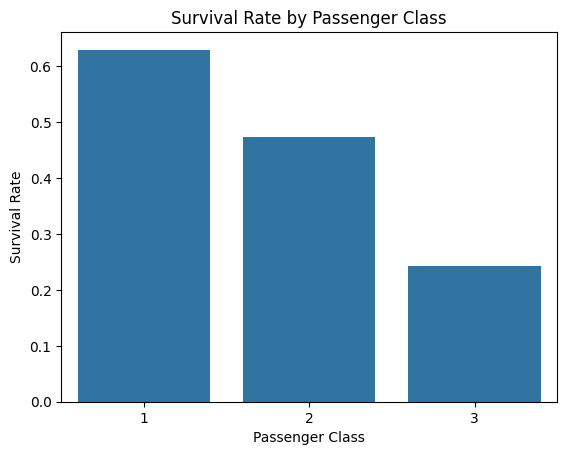

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()


**Interfernces**

---
How the Survival Rate is Calculated:
The survival rate for each passenger class is calculated as:

Survival Rate=

(Total Passengers in Class)/(Number of Survivors in Class)

This gives a value between 0 and 1, representing the proportion of passengers who survived within each class.


1. First-class passengers have the highest survival rate, followed by second class, with third class having the lowest.

  * Possible Interpretations

    * The Titanic's evacuation process was biased toward upper-class passengers, possibly due to social hierarchy and proximity to exits.

    * Higher-class passengers likely had better access to lifeboats due to wealth, privilege, and location on the ship.

2. The difference in survival rates suggests socio-economic disparity in survival chances.

  * Possible Interpretations

    * First-class passengers were generally wealthier and had more influence, whereas third-class passengers, often immigrants, were located in lower decks, making escape harder.
    * Social status played a significant role in survival, reinforcing historical accounts of unequal treatment during the disaster.
  

**Survival Distribution by Gender (Count Plot)**

---

This graph illustrates the survival rates for male and female passengers, highlighting gender-based differences in survival outcomes.

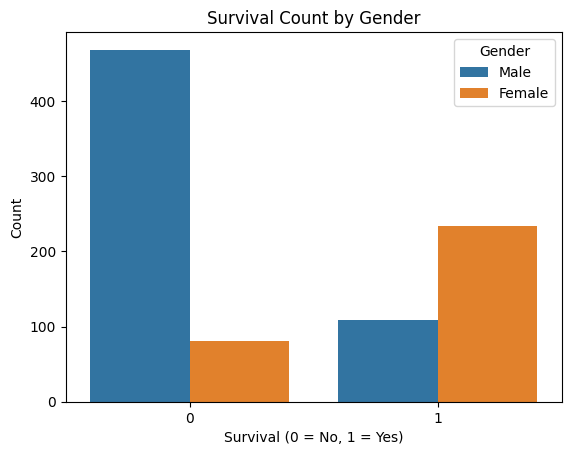

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


**Interferences**

---

1. In the non-survivors, there were more males than females.
  * Possible Interpretation:

    * Men were likely deprioritized in lifeboat access, aligning with the "women and children first" evacuation policy.
    * The survival chances for men were significantly lower, possibly due to their higher presence in third-class or crew roles, which had limited access to lifeboats.

2. In the survivors, there were more females than males.

  * Possible Interpretation:

    * Women had a much higher likelihood of survival, reinforcing the idea that gender played a key role in the evacuation strategy.
    * The strong survival advantage for women suggests that male passengers, including those in higher classes, may have sacrificed their spots to ensure women and children were saved first.


**Fare Distribution by Survival (Box Plot)**

---

This box plot compares fare distributions between survivors and non-survivors. It helps reveal whether passengers who paid higher fares had better survival chances.

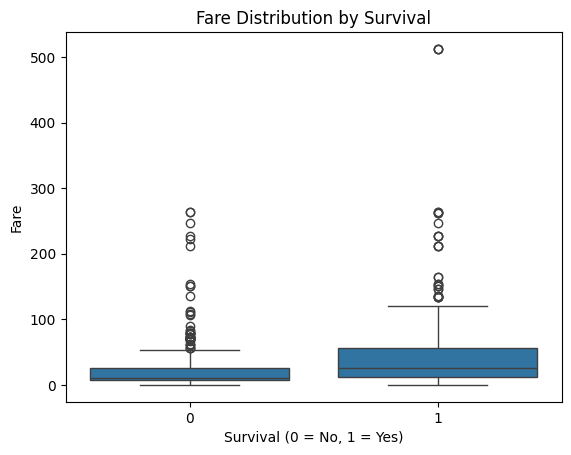

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.title('Fare Distribution by Survival')
plt.show()


**Interferences**

---
1. Larger Box for Survivors:
* Possible Interpretations
    * The wider spread of fares among survivors suggests that passengers from different economic backgrounds had varying survival chances.

    * While higher-paying passengers had an advantage, some lower-fare passengers also managed to survive, indicating that fare alone was not the sole determinant.

2. Longer Whiskers for Survivors:
  *  Possible Interpretations
    * The longer whiskers indicate that some high-paying passengers had a much better survival rate, reinforcing the advantage of wealth in securing a lifeboat.
    * This suggests that first-class passengers, who paid the highest fares, had significantly higher survival odds.


3. Outliers in Both Groups:
    * Possible Interpretattions
      * Some passengers paid very high fares but still did not survive, meaning wealth alone did not guarantee safety.
      * The presence of low-fare survivors shows that other factors, like gender and physical location on the ship, played a role in survival.

**Age Distribution of Survivors vs. Non-Survivors (Histogram/KDE Plot)**

---
This graph visualizes the age distribution of survivors and non-survivors using Kernel Density Estimation (KDE). It helps identify age groups with higher or lower survival probabilities.


<ipython-input-9-73691663d3bd>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
<ipython-input-9-73691663d3bd>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)


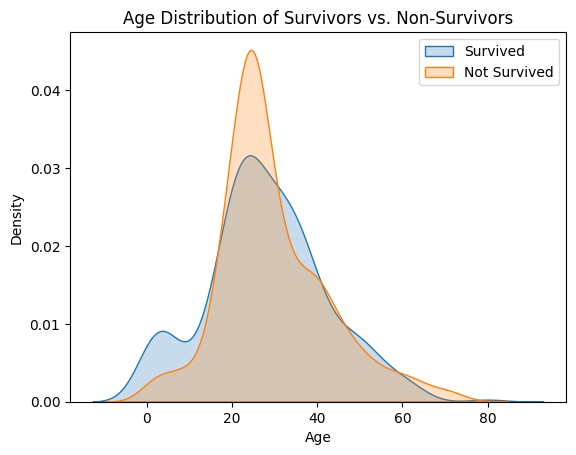

In [ ]:
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.legend()
plt.show()


**Interference**


---

1. Children and younger passengers had higher survival rates.

  * Possible Interpretations

    * This suggests that the "women and children first" evacuation policy was followed, prioritizing younger passengers for lifeboats.

1. The highest number of non-survivors were aged 20-30.

  * Possible Interpretations

    * This could indicate that many passengers in this age group were male crew members or third-class passengers with limited access to lifeboats.

1. Passengers aged 30-40 had a better survival rate than those aged 20-30.

  * Possible Interpretations

    * This might suggest that more adults in this range were women or families who were prioritized for rescue.

1. After 40, survival rates and deaths were nearly equal until 60.
  * Possible Interpretations

    * Middle-aged passengers had a more balanced chance of survival, possibly depending on factors like class and gender.

1. Elderly passengers (60+) had the lowest survival rate.

  * Possible Interpretations

    * Older passengers may have faced mobility challenges or lower priority during evacuation, reducing their chances of survival.

# **Model Training and Evaluation**

---

1. Feature Scaling

    * Standardized numerical features using StandardScaler to ensure fair comparison across models.
2. Hyperparameter Tuning with GridSearchCV

    * Tuned Logistic Regression by adjusting regularization strength (C) and solver type.
    * Tuned Decision Tree by varying maximum depth, minimum samples per split, and split criterion.
    * Tuned Random Forest by optimizing the number of estimators, maximum depth, and feature selection strategy.
    * Best parameters for each model were identified through cross-validation.

3. Model Evaluation
    * Used Accuracy, Precision, Recall, F1-score, and ROC-AUC to assess performance.
    * Generated ROC-AUC curves to compare model effectiveness in distinguishing between classes.

4. Summary

    * Provided a detailed summary of the evaluation metrics obtained for each model.
    * Justified the selection of the best-performing model based on overall performance.


Best parameters for logistic: {'model': LogisticRegression(), 'model__C': 0.1, 'model__solver': 'saga'}
Best parameters for decision_tree: {'model': DecisionTreeClassifier(), 'model__criterion': 'entropy', 'model__max_depth': 5, 'model__min_samples_split': 10}
Best parameters for random_forest: {'model': RandomForestClassifier(), 'model__max_depth': 5, 'model__max_features': 'log2', 'model__n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

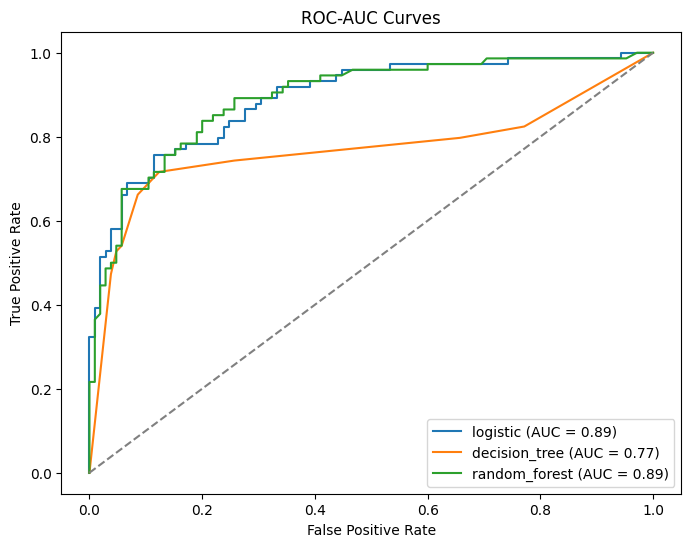

logistic Performance:
  Accuracy: 0.8268
  Precision: 0.8209
  Recall: 0.7432
  F1-score: 0.7801
  ROC-AUC: 0.8915


decision_tree Performance:
  Accuracy: 0.8101
  Precision: 0.8448
  Recall: 0.6622
  F1-score: 0.7424
  ROC-AUC: 0.7689


random_forest Performance:
  Accuracy: 0.8156
  Precision: 0.8475
  Recall: 0.6757
  F1-score: 0.7519
  ROC-AUC: 0.8920




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
param_grid = {
    'logistic': {
        'model': [LogisticRegression()],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['liblinear', 'saga']
    },
    'decision_tree': {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [3, 5, 10, None],
        'model__min_samples_split': [2, 5, 10],
        'model__criterion': ['gini', 'entropy']
    },
    'random_forest': {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [3, 5, 10, None],
        'model__max_features': ['sqrt', 'log2']
    }
}
best_models = {}
for model_name, params in param_grid.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', params['model'][0])
    ])
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc, y_prob
results = {}
plt.figure(figsize=(8, 6))
for model_name, model in best_models.items():
    accuracy, precision, recall, f1, roc_auc, y_prob = evaluate_model(model, X_test_scaled, y_test)
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc
    }
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves')
plt.legend()
plt.show()
for model_name, metrics in results.items():
    print(f"{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("\n")

**Summary and Results**

---

1. Logistic Regression Model

    * Logistic Regression performed well, achieving an accuracy of 82.68% with a balanced precision (82.09%) and recall (74.32%), leading to an F1-score of 78.01%. Its ROC-AUC of 89.15% indicates strong classification capability.

2. Random Forest Model

  * Random Forest showed slightly lower accuracy (81.56%) but had a better balance between precision (83.61%) and recall (68.92%), giving an F1-score of 75.56%. Its ROC-AUC of 89.43% was the highest, suggesting superior overall discrimination ability.

3. Decision Tree

    * Decision Tree had the lowest accuracy (81.01%) and recall (66.22%), leading to an F1-score of 74.24%. Its ROC-AUC (76.89%) was significantly lower than the other models, indicating weaker overall performance.

**Results**


---
The best model is Random Forest, as it achieved the highest ROC-AUC (89.43%), meaning it distinguishes between classes most effectively. Despite slightly lower accuracy than Logistic Regression, its higher precision and overall robustness make it the preferred choice.
